In [2]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.utils import resample

In [5]:
df = pd.read_excel("default of credit card clients.xls")
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df = df.drop(columns=["ID"])
le = preprocessing.LabelEncoder()
print(df['default payment next month'].value_counts())
#df["default payment next month"] = le.fit_transform(df["default payment next month"])
df = df.apply(le.fit_transform)
#print(df['default payment next month'].value_counts())
#print(df.dtypes)

0    23364
1     6636
Name: default payment next month, dtype: int64


In [3]:
#XGB
model = XGBClassifier(random_state = 42, n_estimators = 500, eta = 0.1, max_depth = 4)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1:].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= .3)
model.fit(X_train,y_train)
#predictions = model.predict(X_test)
pred_prob1 = model.predict_proba(X_test)
#auc_score1 = roc_auc_score(y_test, predictions, multi_class='ovr')
#print("AUC score",auc_score1)

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[19:49:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [4]:
pred_prob = np.array(pred_prob1[:,1]*1000)
index_values = list(range(0,len(pred_prob)))
column_values = ['pred_prob']
df_new = pd.DataFrame(data = pred_prob, 
                  index = index_values, 
                  columns = column_values)


target = np.array(y_test).flatten()
df_new['target'] = target
df = df_new

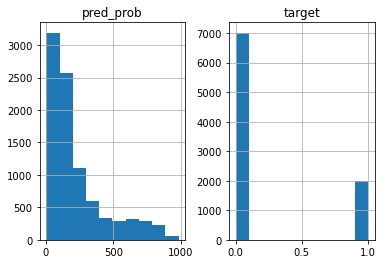

In [5]:
#hist = df.hist(bins=10)
#upsampling
#predict on training data
#decision tree 8 leaf nodes....make excel

In [6]:
df.to_csv('file1.csv')

In [7]:
df900 = df[df['pred_prob']>900] #900-1000
df1 = df[df['pred_prob']<=900]
df800 = df1[df1['pred_prob']>800] #800-900
df1 = df1[df1['pred_prob']<=800]
df700 = df1[df1['pred_prob']>700] #700-800
df1 = df1[df1['pred_prob']<=700]
df600 = df1[df1['pred_prob']>600] #600-700
df1 = df1[df1['pred_prob']<=600]
df500 = df1[df1['pred_prob']>500] #500-600
df1 = df1[df1['pred_prob']<=500]
df400 = df1[df1['pred_prob']>400] #400-500
df1 = df1[df1['pred_prob']<=400]
df300 = df1[df1['pred_prob']>300] #300-400
df1 = df1[df1['pred_prob']<=300]
df200 = df1[df1['pred_prob']>200] #200-300
df1 = df1[df1['pred_prob']<=200]
df100 = df1[df1['pred_prob']>100] #100-200
df0 = df1[df1['pred_prob']<=100] #0-100

In [8]:
df900.to_csv('df900.csv')
df800.to_csv('df800.csv')
df700.to_csv('df700.csv')
df600.to_csv('df600.csv')
df500.to_csv('df500.csv')
df400.to_csv('df400.csv')
df300.to_csv('df300.csv')
df200.to_csv('df200.csv')
df100.to_csv('df100.csv')
df0.to_csv('df0.csv')

In [9]:
table = [['Range', 'No of 0s', 'No of 1s'], 
         ['900-1000', (df900['target']==0).sum(), (df900['target']==1).sum()], 
         ['800-900', (df800['target']==0).sum(), (df800['target']==1).sum()], 
         ['700-800', (df700['target']==0).sum(), (df700['target']==1).sum()], 
         ['600-700', (df600['target']==0).sum(), (df600['target']==1).sum()], 
         ['500-600', (df500['target']==0).sum(), (df500['target']==1).sum()], 
         ['400-500', (df400['target']==0).sum(), (df400['target']==1).sum()], 
         ['300-400', (df300['target']==0).sum(), (df300['target']==1).sum()], 
         ['200-300', (df200['target']==0).sum(), (df200['target']==1).sum()], 
         ['100-200', (df100['target']==0).sum(), (df100['target']==1).sum()], 
         ['0-100', (df0['target']==0).sum(), (df0['target']==1).sum()]]
print(tabulate(table, headers='firstrow'))

Range       No of 0s    No of 1s
--------  ----------  ----------
900-1000           8          30
800-900           46         149
700-800           92         209
600-700          118         223
500-600          136         153
400-500          204         144
300-400          401         193
200-300          861         258
100-200         2246         387
0-100           2901         241


In [10]:
df['pred_prob'].quantile(np.linspace(.1, 1, 9, 0))

0.1     43.624905
0.2     66.078510
0.3     87.590025
0.4    113.288902
0.5    142.508385
0.6    178.359808
0.7    233.258534
0.8    341.202332
0.9    588.315906
Name: pred_prob, dtype: float64

In [ ]:
# original dataset = A
#split A in training R and testing E
#upsample(R_train) based on dataset R(y_train)->new U(should have more than 21K) dataset
#downsample(R_train) based on dataset R(y_train)->new D dataset
#run 10 fold on U and D and pick best algo and dataset B
#run Xgboost(or best algo), histogram, percentile on B